# The Journey of Human Innovation: From Fire to AI

## 1. Introduction: The Beginning of Innovation
Humans have always been innovators. From the discovery of fire to the invention of the wheel, these early breakthroughs enabled survival and productivity. Over centuries, technological advancements have continued to shape human work and society.

## 2. The Transition to Modern Work
The Industrial Revolution mechanized labor, drastically increasing productivity but also introducing long working hours. Over time, as technology advanced, working hours began to decline in many parts of the world.

## Code: Load and Explore Data

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
working_hours = pd.read_csv('data/annual-working-hours-per-worker.csv')
researchers=pd.read_csv('data/researchers-in-rd-per-million-people.csv')
merged_data = pd.merge(working_hours, researchers, on=['Entity', 'Year'], how='inner')
merged_data.head()

,Entity,Code_x,Year,Average annual working hours per worker,Code_y,Researchers in R&D (per million people)
0,Australia,AUS,1996,1868.7593,AUS,3370.9177
1,Australia,AUS,1998,1851.2338,AUS,3397.1880
2,Australia,AUS,2000,1854.0353,AUS,3491.5256
3,Australia,AUS,2002,1814.1021,AUS,3778.8804
4,Australia,AUS,2004,1805.0198,AUS,4098.5146


<h3> Addressing Missing Values </h3>

In [51]:
print("\nMissing Values:")
print(merged_data.isnull().sum())
print("\nDataset Statistics:")
print(merged_data.describe())


Missing Values:
Entity                                     0
Code_x                                     0
Year                                       0
Average annual working hours per worker    0
Code_y                                     0
Researchers in R&D (per million people)    0
dtype: int64

Dataset Statistics:
              Year  Average annual working hours per worker  \
count   136.000000                               136.000000   
mean   2006.514706                              1611.093013   
std       6.285769                               128.629746   
min    1996.000000                              1353.886800   
25%    2001.000000                              1528.657175   
50%    2006.500000                              1602.095400   
75%    2012.000000                              1699.134900   
max    2017.000000                              1868.759300   

       Researchers in R&D (per million people)  
count                               136.000000  
mean         

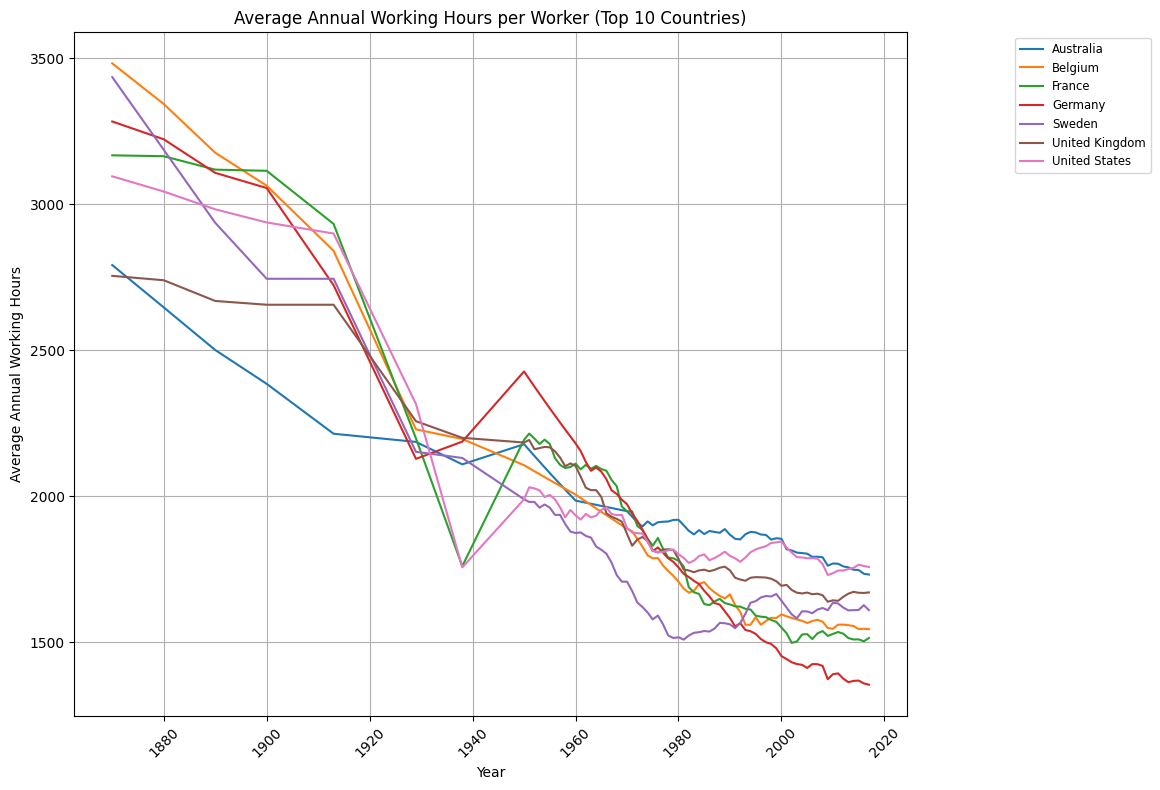

In [57]:
working_hours['Year'] = pd.to_numeric(working_hours['Year'], errors='coerce')
working_hours['Average annual working hours per worker'] = pd.to_numeric(working_hours['Average annual working hours per worker'], errors='coerce')
top_countries = (
    working_hours.groupby('Entity')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .index
)
filtered_df = working_hours[working_hours['Entity'].isin(top_countries)]
plt.figure(figsize=(12, 8))
for entity in top_countries:
    country_data = filtered_df[filtered_df['Entity'] == entity]
    plt.plot(
        country_data['Year'],
        country_data['Average annual working hours per worker'],
        label=entity,
        linewidth=1.5
    )
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1, fontsize='small')
plt.title('Average Annual Working Hours per Worker (Top 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Average Annual Working Hours')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

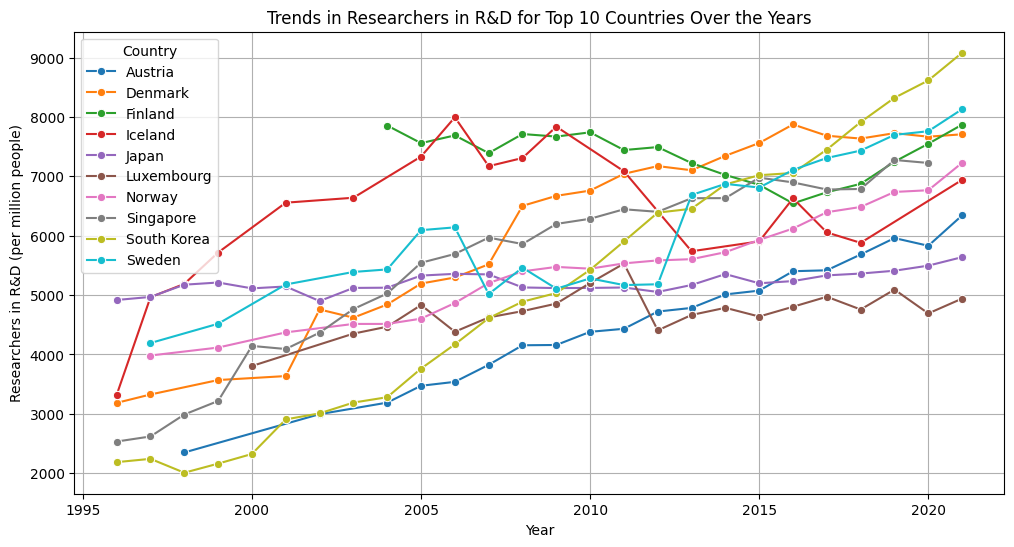

In [ ]:
# Calculate the average number of researchers per country
average_researchers = researchers.groupby('Entity')['Researchers in R&D (per million people)'].mean().reset_index()

# Sort countries by the highest average number of researchers and select the top 10
top_10_countries = average_researchers.sort_values(by='Researchers in R&D (per million people)', ascending=False).head(10)

# Filter the dataset for only the top 10 countries
filtered_researchers = researchers[researchers['Entity'].isin(top_10_countries['Entity'])]

# Plot trends in researchers in R&D for the top 10 countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_researchers, x='Year', y='Researchers in R&D (per million people)', hue='Entity', marker='o')
plt.title('Trends in Researchers in R&D for Top 10 Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Researchers in R&D (per million people)')
plt.legend(title='Country', loc='upper left')
plt.grid(True)
plt.show()

In [61]:
# Correlation Analysis

# Correlation between working hours and researchers in R&D
correlation_rnd_hours = merged_data["Average annual working hours per worker"].corr(
    merged_data["Researchers in R&D (per million people)"]
)
print(f"Correlation between working hours and researchers in R&D: {correlation_rnd_hours}")

# Correlation between researchers in R&D and obesity rates
correlation_rnd_obesity = merged_data["Researchers in R&D (per million people)"].corr(
    merged_data["Obesity Rate (%)"]
)
print(f"Correlation between researchers in R&D and obesity rates: {correlation_rnd_obesity}")

# Correlation between working hours and obesity rates
correlation_hours_obesity = merged_data["Average annual working hours per worker"].corr(
    merged_data["Obesity Rate (%)"]
)
print(f"Correlation between working hours and obesity rates: {correlation_hours_obesity}")

Correlation between working hours and researchers in R&D: -0.06472907961959222


KeyError: 'Obesity Rate (%)'

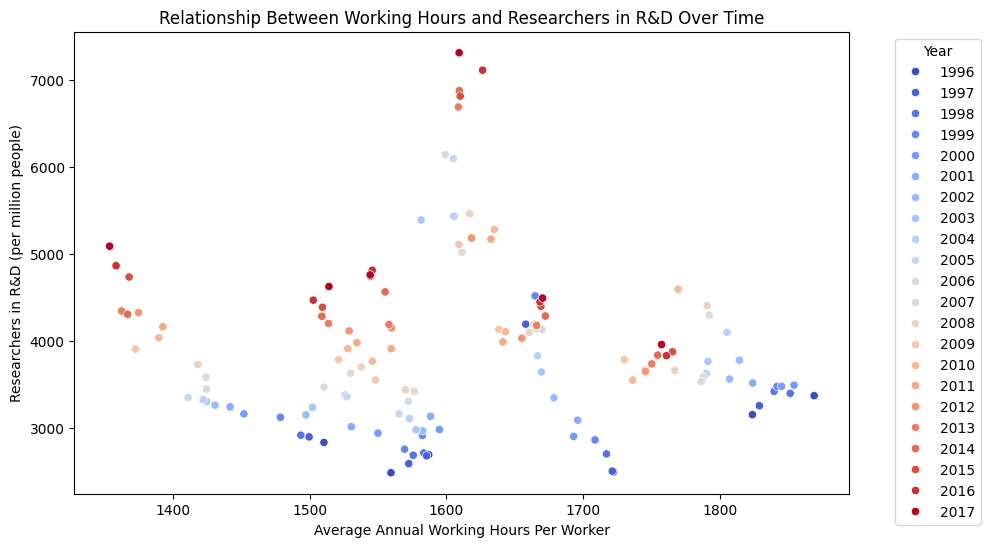

In [55]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=merged_data,
    x='Average annual working hours per worker',
    y='Researchers in R&D (per million people)',
    hue='Year',
    palette='coolwarm',
    legend='full'
)
plt.title('Relationship Between Working Hours and Researchers in R&D Over Time')
plt.xlabel('Average Annual Working Hours Per Worker')
plt.ylabel('Researchers in R&D (per million people)')
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()